In [3]:
import numpy as np

In [4]:
def gen_text(ind, tl):
    p = np.argmax(np.random.dirichlet(distr[ind], tl), axis=1)
    s = tf_idf.get_feature_names_out()[p]
    sentence = ' '.join(word for word in s)
    return sentence

In [9]:
s = np.random.dirichlet((10, 5, 3), 20)
s.shape
s

array([[0.51330345, 0.35422589, 0.13247066],
       [0.56955328, 0.31947518, 0.11097154],
       [0.56804176, 0.30736769, 0.12459055],
       [0.62804975, 0.23054273, 0.14140752],
       [0.53826729, 0.28992709, 0.17180562],
       [0.52682361, 0.25060126, 0.22257513],
       [0.53597386, 0.19136157, 0.27266457],
       [0.6720056 , 0.23239644, 0.09559795],
       [0.56546113, 0.31107154, 0.12346733],
       [0.35969671, 0.38375554, 0.25654775],
       [0.58811367, 0.13677424, 0.2751121 ],
       [0.73986605, 0.15755746, 0.1025765 ],
       [0.53623599, 0.42794595, 0.03581806],
       [0.519692  , 0.34029186, 0.14001614],
       [0.41262461, 0.40640255, 0.18097284],
       [0.58173837, 0.24408741, 0.17417421],
       [0.33196944, 0.24953186, 0.4184987 ],
       [0.63107069, 0.2782579 , 0.09067141],
       [0.57574751, 0.2489119 , 0.17534059],
       [0.5856645 , 0.24532453, 0.16901097]])

In [10]:
s = np.random.choice((10, 5, 3), 20)
s.shape
s

array([ 3,  3, 10,  3, 10, 10,  5,  5, 10,  5,  3,  3, 10,  3, 10,  3,  3,
        3,  5,  3])

In [2]:
import os
import lime
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
# import multiprocessing as mp
import multiprocess as mp

from functools import partial
from tensorflow import keras

from tensorboard.plugins import projector
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import (precision_score, recall_score,
                             accuracy_score, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

In [3]:
# Model definition:
model = keras.Sequential(name='Simple_FCNN')
model.add(keras.layers.Dense(300, activation='relu', input_shape=(300,)))
model.add(keras.layers.Dense(150, activation='relu'))
model.add(keras.layers.Dense(6, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[keras.metrics.Precision(),
                       keras.metrics.Recall(),
                       keras.metrics.BinaryAccuracy()])
model.summary()

Model: "Simple_FCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               90300     
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 6)                 906       
                                                                 
Total params: 136,356
Trainable params: 136,356
Non-trainable params: 0
_________________________________________________________________


2021-12-23 22:13:31.947167: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


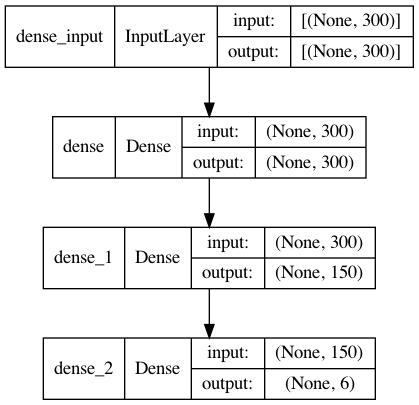

In [4]:
tf.keras.utils.plot_model(model, show_shapes=True)